# Propeller masses regression

In this Notebook a relationship between the propeller's geometry and its mass will be found. From the study of several propellers' families, a scaling law or regression model can be extracted to determine future propeller masses from their diameters. 

For the dynamic representation of data we use here an interactive grid for sorting and editing DataFrames, called *qgrid*. More information about this Jupyter notebook widget and about its installation is given on its [site](https://github.com/quantopian/qgrid).

## Filtering static propellers data

The propeller families used to find an appropiate regression model are the following ones:
- APC Propellers Multirotor
- GWS SF and Direct-Drive
- PJP
- KDE 


In the end of the document, the corresponding references are detailed.

In [1]:
import numpy as np
import pandas as pd
import qgrid
import ipywidgets as ipyw

path='./Data/'
df = pd.read_csv(path+'PropellerMass.csv',sep=';')

# Print the head (first lines of the file)
qgrid_widget = qgrid.show_grid(df, show_toolbar=True)
qgrid_widget.layout = ipyw.Layout(width='100%')
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

<IPython.core.display.Javascript object>


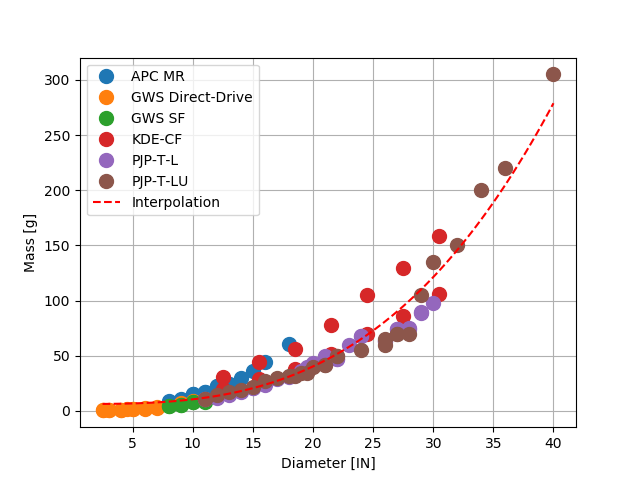

Interpolation model : M=6.19e+00 +4.26e-03 *D^3


In [3]:
import numpy as np
import pylab
from scipy.optimize import curve_fit

%matplotlib nbagg
import matplotlib.pyplot as plt

#use values of qgrid dynamic table
qgrid_df = qgrid_widget.get_changed_df()
xdata = qgrid_df['DIAMETER_IN'].values
ydata = qgrid_df['MASS_g'].values

#find the regression coefficients
def func (D,a,b):
    return a+b*D**3

popt=curve_fit(func,xdata,ydata)

D=np.linspace(xdata.min(),xdata.max(),num=100)

M=popt[0][0]+popt[0][1]*D**3

#plot scatter data with its respective type
fig, ax = plt.subplots()
groups = qgrid_df.groupby('TYPE')
for name, group in groups:
    ax.plot(group.DIAMETER_IN, group.MASS_g, marker='o', linestyle='', ms=10, 
label=name)
    
plt.xlabel('Diameter [IN]')
plt.ylabel('Mass [g]')

#plot interpolation line
ax.plot(D,M,'--r',label='Interpolation')
ax.grid()
ax.legend(loc='upper left')

print("Interpolation model : M=%.2e +%.2e *D^3"%(popt[0][0],popt[0][1]))


## References

- [KDE Direct Multi Rotor Propeller Blades](https://www.kdedirect.com/collections/multi-rotor-propeller-blades)
- [APC Propeller Performance](https://www.apcprop.com/technical-information/performance-data/)
- [UIUC Propeller Data Site](https://m-selig.ae.illinois.edu/props/volume-1/propDB-volume-1.html)
- [XOAR Multicopter Propellers](https://www.xoarintl.com/multicopter-propellers/)
